In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [6]:
datos=datasets.load_iris()

In [7]:
datos

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
x=datos["data"][:,0:3]
y=  datos["target"]

In [14]:
#estandarización

(150,)

In [16]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-0.90068117,  1.01900435, -1.34022653],
       [-1.14301691, -0.13197948, -1.34022653],
       [-1.38535265,  0.32841405, -1.39706395],
       [-1.50652052,  0.09821729, -1.2833891 ],
       [-1.02184904,  1.24920112, -1.34022653],
       [-0.53717756,  1.93979142, -1.16971425],
       [-1.50652052,  0.78880759, -1.34022653],
       [-1.02184904,  0.78880759, -1.2833891 ],
       [-1.74885626, -0.36217625, -1.34022653],
       [-1.14301691,  0.09821729, -1.2833891 ],
       [-0.53717756,  1.47939788, -1.2833891 ],
       [-1.26418478,  0.78880759, -1.22655167],
       [-1.26418478, -0.13197948, -1.34022653],
       [-1.87002413, -0.13197948, -1.51073881],
       [-0.05250608,  2.16998818, -1.45390138],
       [-0.17367395,  3.09077525, -1.2833891 ],
       [-0.53717756,  1.93979142, -1.39706395],
       [-0.90068117,  1.01900435, -1.34022653],
       [-0.17367395,  1.70959465, -1.16971425],
       [-0.90068117,  1.70959465, -1.2833891 ],
       [-0.53717756,  0.78880759, -1.169

In [20]:
import seaborn as sns

In [24]:
xdf=pd.DataFrame(x,columns=datos["feature_names"][0:3])
xdf
#sns.pairplot(xdf)

,sepal length (cm),sepal width (cm),petal length (cm)
0,-0.900681,1.019004,-1.340227
1,-1.143017,-0.131979,-1.340227
2,-1.385353,0.328414,-1.397064
3,-1.506521,0.098217,-1.283389
4,-1.021849,1.249201,-1.340227
...,...,...,...
145,1.038005,-0.131979,0.819596
146,0.553333,-1.282963,0.705921
147,0.795669,-0.131979,0.819596
148,0.432165,0.788808,0.933271


In [26]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

In [36]:
x_test.shape

(45, 3)

In [37]:
from sklearn.naive_bayes import GaussianNB

In [39]:
cnBG=GaussianNB()

In [41]:
#se aplica la distribución "normal"
cnBG.fit(x_train,y_train)

GaussianNB()

In [ ]:
#Desempeño del conjunto de prueba, estos no los conoce..

In [42]:
ypredTest=cnBG.predict(x_test)

In [43]:
from sklearn.metrics import confusion_matrix

In [45]:
mx=confusion_matrix(y_test, ypredTest)
mx

array([[15,  0,  0],
       [ 0, 13,  2],
       [ 0,  3, 12]])

<Axes: >

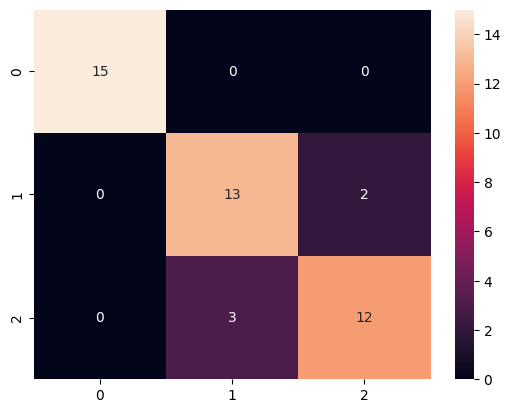

In [46]:
sns.heatmap(mx,annot=True)

In [47]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, ypredTest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.81      0.87      0.84        15
           2       0.86      0.80      0.83        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45



In [ ]:
#Desempeño con entrenamiento, con el que conoce

In [50]:
ypredTrain=cnBG.predict(x_train)

In [51]:
mxT=confusion_matrix(y_train, ypredTrain)
mxT

array([[35,  0,  0],
       [ 0, 31,  4],
       [ 0,  9, 26]])

<Axes: >

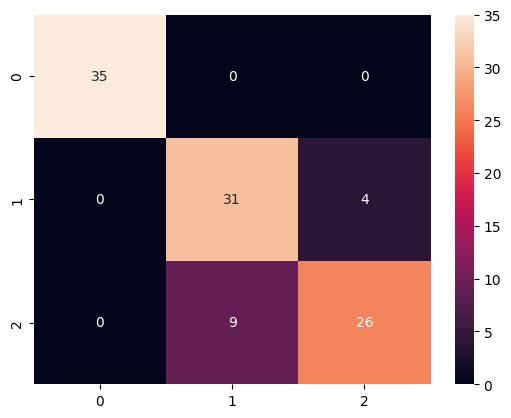

In [52]:
sns.heatmap(mxT,annot=True)

In [53]:
print(classification_report(y_train, ypredTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.78      0.89      0.83        35
           2       0.87      0.74      0.80        35

    accuracy                           0.88       105
   macro avg       0.88      0.88      0.88       105
weighted avg       0.88      0.88      0.88       105

